In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.primitives import Estimator
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

In [15]:
x_param = Parameter("x")
theta = Parameter("θ")

qc = QuantumCircuit(1)
qc.ry(x_param, 0)       # Encode input
qc.ry(theta, 0)         # Trainable param

In [16]:
estimator = Estimator()
qnn = EstimatorQNN(
    circuit=qc,
    input_params=[x_param],
    weight_params=[theta],
    estimator=estimator
)
qnn_layer = TorchConnector(qnn)

In [17]:
model = nn.Sequential(
    qnn_layer,
    nn.Linear(1, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [18]:
def main(xs, ys):
    train_inputs = torch.tensor(xs, dtype=torch.float32).unsqueeze(1)
    train_targets = torch.tensor(ys, dtype=torch.float32).unsqueeze(1)


    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.1)
    num_epochs = 100
    loss_history = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        predictions = model(train_inputs)
        loss = loss_fn(predictions, train_targets)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

    with torch.no_grad():
        predictions = model(train_inputs).squeeze().numpy()

    plt.figure(figsize=(8, 4))
    plt.plot(xs, ys, 'b-', label="Target: sin(x)")
    plt.plot(xs, predictions, 'r--', label="QNN Prediction")
    plt.xlabel("x")
    plt.ylabel("Value")
    plt.legend()
    plt.title("Quantum Neural Network Regression")
    plt.show()


    plt.figure(figsize=(8, 4))
    plt.plot(loss_history, 'm-')
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("QNN Training Loss")
    plt.grid(True)
    plt.show()

Epoch 0: Loss = 0.0295
Epoch 10: Loss = 0.1079
Epoch 20: Loss = 0.0779
Epoch 30: Loss = 0.0411
Epoch 40: Loss = 0.0321
Epoch 50: Loss = 0.0310
Epoch 60: Loss = 0.0307
Epoch 70: Loss = 0.0304
Epoch 80: Loss = 0.0298
Epoch 90: Loss = 0.0294


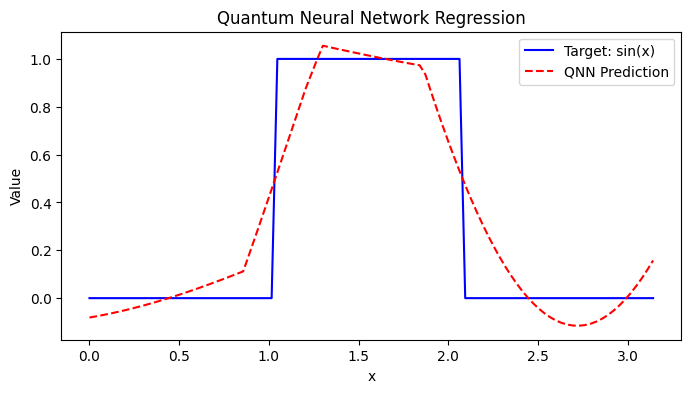

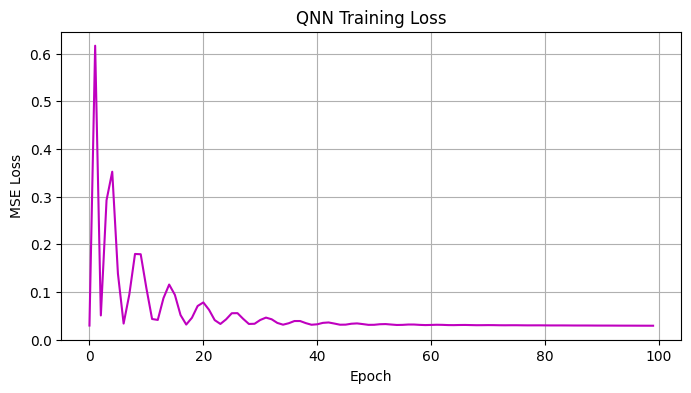

In [17]:
if __name__ == "__main__":
    xs = np.linspace(0, np.pi, 100)
    ys = np.where((xs >= np.pi/3) & (xs <= 2*np.pi/3), 1.0, 0.0)

    main(xs, ys)

Epoch 0: Loss = 0.2996
Epoch 10: Loss = 0.0915
Epoch 20: Loss = 0.0535
Epoch 30: Loss = 0.0231
Epoch 40: Loss = 0.0115
Epoch 50: Loss = 0.0109
Epoch 60: Loss = 0.0065
Epoch 70: Loss = 0.0046
Epoch 80: Loss = 0.0037
Epoch 90: Loss = 0.0030


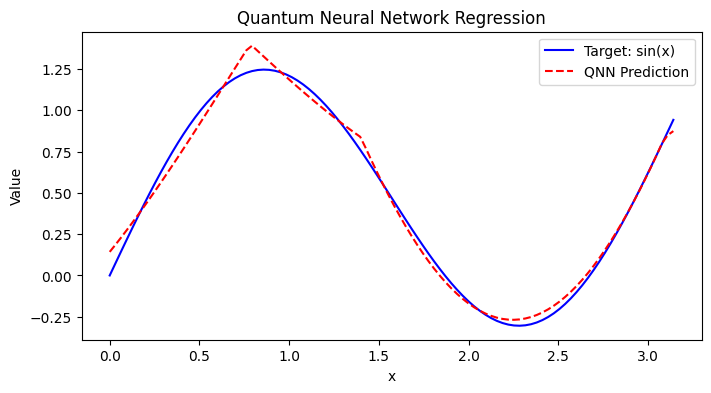

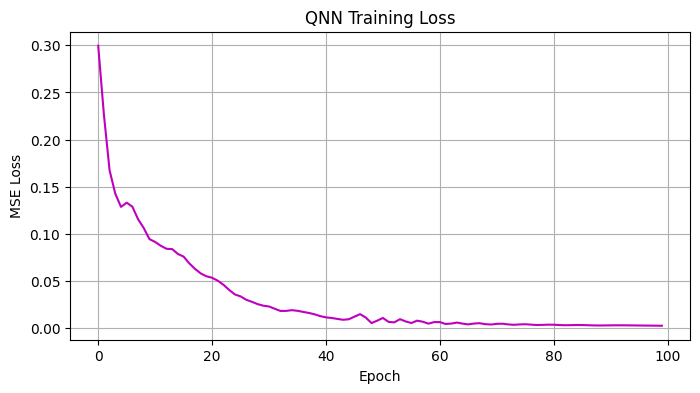

In [14]:
if __name__ == "__main__":
    # Target function: f(x) = sin(2x) + 0.3 * x
    xs = np.linspace(0, np.pi, 100)
    ys = np.sin(2 * xs) + 0.3 * xs

    main(xs, ys)

Epoch 0: Loss = 0.3614
Epoch 10: Loss = 0.0679
Epoch 20: Loss = 0.0323
Epoch 30: Loss = 0.0085
Epoch 40: Loss = 0.0065
Epoch 50: Loss = 0.0052
Epoch 60: Loss = 0.0043
Epoch 70: Loss = 0.0040
Epoch 80: Loss = 0.0040
Epoch 90: Loss = 0.0040


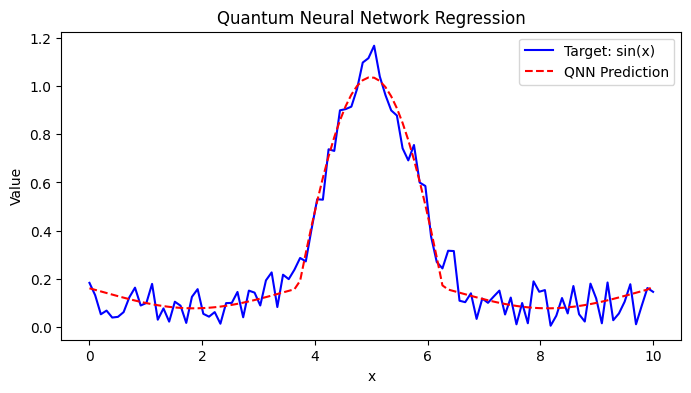

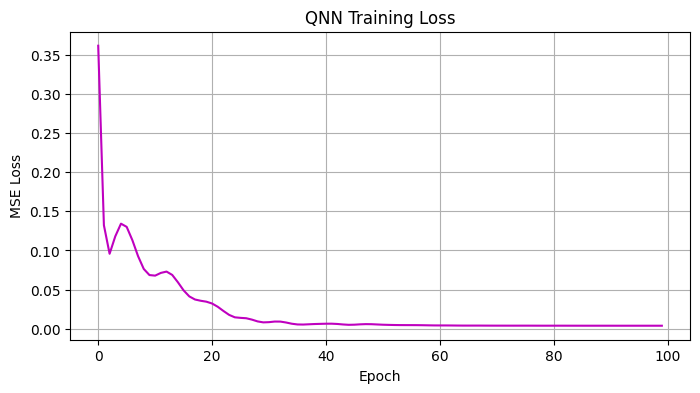

In [8]:
if __name__ == "__main__":
    xs = np.linspace(0, 10, 100)
    ys = np.exp(-(xs - 5)**2) + 0.2 * np.random.rand(100)

    main(xs, ys)

Epoch 0: Loss = 0.5167
Epoch 10: Loss = 0.1276
Epoch 20: Loss = 0.0430
Epoch 30: Loss = 0.0154
Epoch 40: Loss = 0.0145
Epoch 50: Loss = 0.0113
Epoch 60: Loss = 0.0108
Epoch 70: Loss = 0.0105
Epoch 80: Loss = 0.0102
Epoch 90: Loss = 0.0101


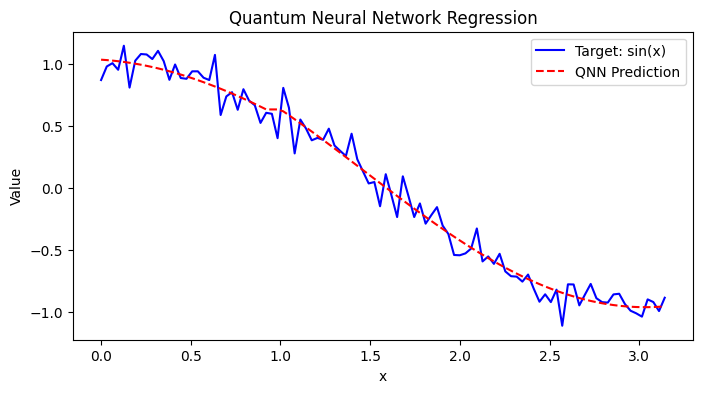

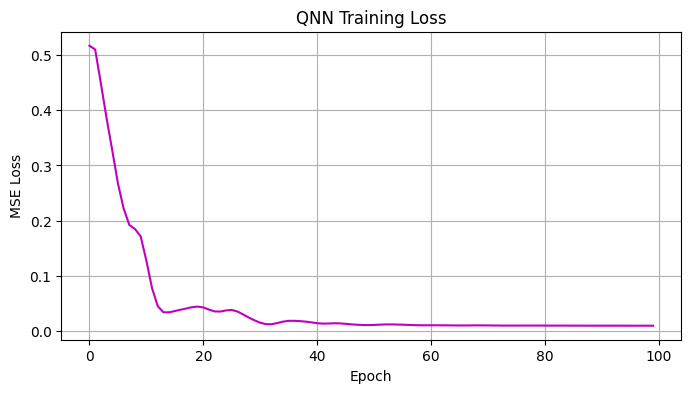

In [9]:
if __name__ == "__main__":
    xs = np.linspace(0, np.pi, 100)
    ys = np.cos(xs) + 0.1 * np.random.randn(len(xs))

    main(xs, ys)

Epoch 0: Loss = 0.0264
Epoch 10: Loss = 0.0365
Epoch 20: Loss = 0.0187
Epoch 30: Loss = 0.0158
Epoch 40: Loss = 0.0116
Epoch 50: Loss = 0.0095
Epoch 60: Loss = 0.0079
Epoch 70: Loss = 0.0063
Epoch 80: Loss = 0.0051
Epoch 90: Loss = 0.0045


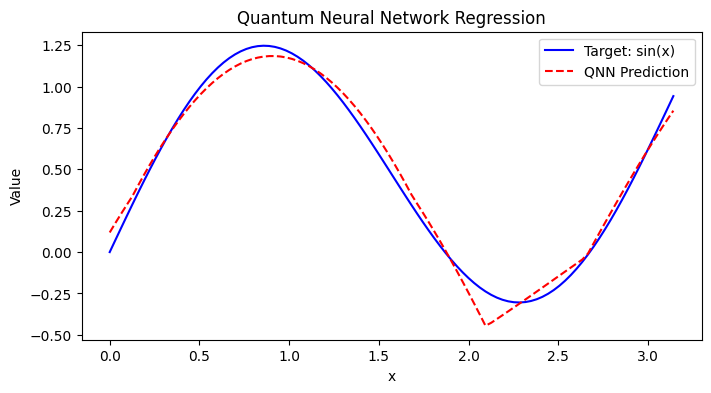

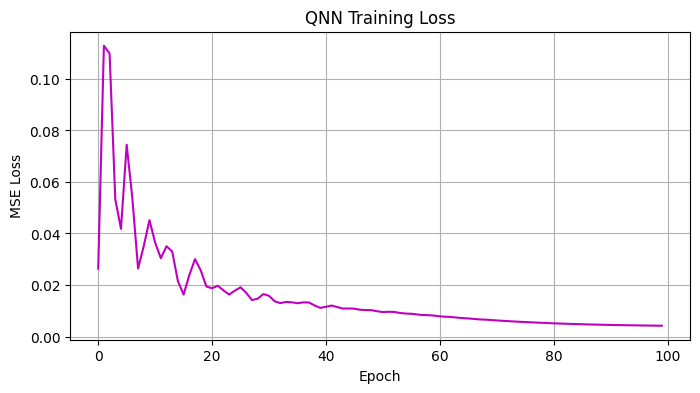

In [21]:
if __name__ == "__main__":
    # Target function: f(x) = sin(2x) + 0.3 * x

    
    xs = np.linspace(0, np.pi, 100)
    ys = np.sin(2 * xs) + 0.3 * xs

    main(xs, ys)

Epoch 0: Loss = 0.5593
Epoch 10: Loss = 0.0739
Epoch 20: Loss = 0.0380
Epoch 30: Loss = 0.0081
Epoch 40: Loss = 0.0024
Epoch 50: Loss = 0.0010
Epoch 60: Loss = 0.0004
Epoch 70: Loss = 0.0003
Epoch 80: Loss = 0.0001
Epoch 90: Loss = 0.0001


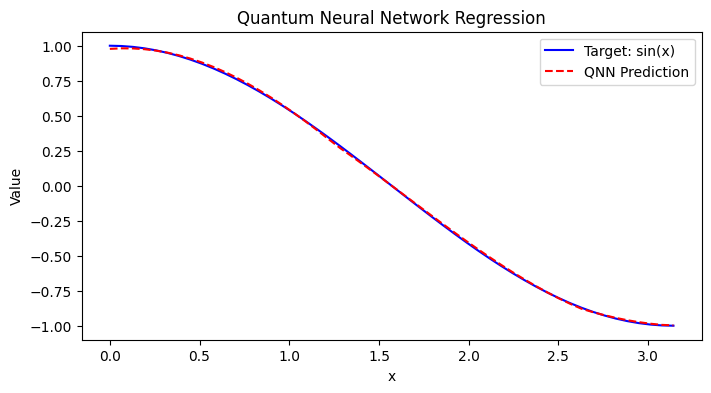

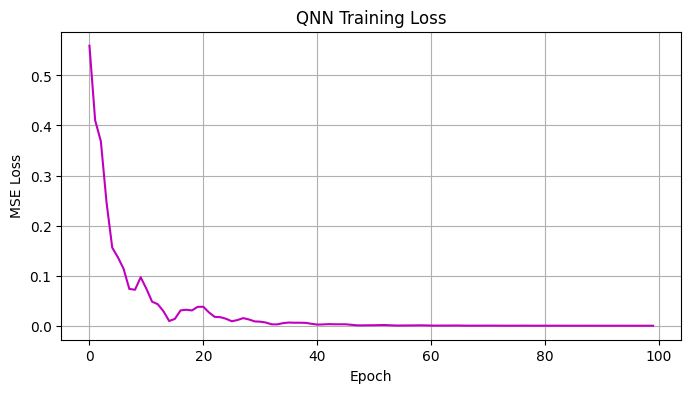

In [19]:
if __name__ == "__main__":
    xs = np.linspace(0, np.pi, 50)
    ys = np.cos(xs)

    main(xs, ys)